In [2]:
import cv2 

In [3]:
import matplotlib.pyplot as plt

In [4]:
config_file =  'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [5]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [6]:
classLabels = [] ##empty list
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    #classLables.append(fpt.read())

In [7]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ## 255/2 = 127.5
model.setInputMean((127.5,127.5,127.5)) ## mobilenet => [-1,1]
model.setInputSwapRB(True)

< cv2.dnn.Model 000001D153324B50>

# Read image

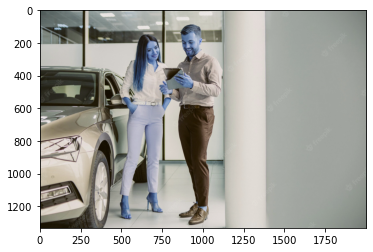

In [9]:
img  = cv2.imread('image6.jpg')
plt.imshow(img)#bgr

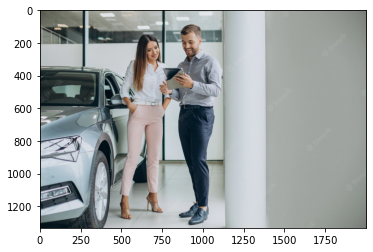

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [11]:
ClassIndex, confidece, bbox =  model.detect(img,confThreshold = 0.5)

In [12]:
print(ClassIndex)

[1 3 1]


In [13]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    #cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    #cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)
    cv2.rectangle(img, boxes, (255, 0, 0), 2 )
    cv2.putText(img,classLabels[ClassInd-1], (boxes[0]+10,boxes[1]+48), font, fontScale=font_scale,color=(0, 255, 0),thickness=3)

image written as team.png


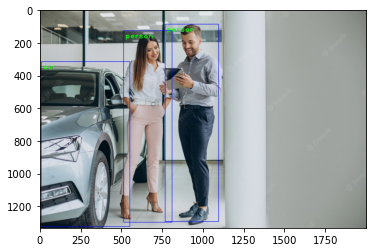

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

if(cv2.imwrite("temp.png",img)):
    print("image written as team.png")

# for video

In [16]:
cap = cv2.VideoCapture("video 1.mp4")

#check if the video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open or load video")
    

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read() 
    
    ClassIndex, confidece, bbox =  model.detect(frame,confThreshold = 0.55)
    
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame, boxes,(255, 0, 0), 2 )
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255,0),thickness=3)
                
    cv2.imshow('Object detected in this video',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

[ 3  3 10]
[ 3  3 10]
[ 3  3 10]
[3 3]
[3 3 1]
[3 3]
[3 3]
[3 3]
[3 3]
[3 3]
[ 3  3 10]
[ 3  3 10]
[ 3  3  3 10]
[ 3  3  3 10]
[ 3  3  1 10  3]
[ 3  1 10]
[ 3  1 10]
[ 3  1 10]
[ 3  1 10]
[ 3  1 10]
[ 3  1 10]
[ 3  1 10]
[ 3 10  1]
[ 3 10  1]
[ 3 10]
[ 3 10]
[ 3 10]
[ 3 10]
[3]
[ 3 10]
[ 3  1 10]
[ 3  1 10]
[ 3  1 10]
[ 1  3 10]
[ 3  1 10]
[ 3  1 10]
[ 3  1 10]
[ 3 10]
[ 3 10]
[ 3 10]
[ 3 10]
[ 3 10]
[ 3 10]
[ 3 10]
[ 3 10]
[ 3 10]
[ 3 10]
[ 3 10]
[ 3 10]
[ 3 10]
[ 3 10]
[ 3 10  1]
[ 3  3 10  1]
[ 3  3 10]
[ 3  3 10]
[ 3  3 10]
[ 3  3 10]
[ 3  3 10]
[ 3  3 10]
[ 3  3 10]
[ 3  3 10  3]
[ 3  3 10]
[ 3  3 10  3]
[ 3  3 10]
[ 3  3 10]
[ 3  3 10]
[ 3  3 10]
[ 3 10  3]
[ 3 10]
[ 3 10  1]
[ 3  1 10]
[ 3 10  1]
[ 3 10  1]
[ 3  1 10]
[ 3  1 10]
[ 1  3 10]
[ 3  1 10]
[ 3  1 10]
[ 3  1 10]
[ 3 10  1]
[ 3 10  1]
[ 3 10  1]
[ 3 10  1]
[ 3 10  1]
[ 3 10  1]
[ 3 10  1]
[ 3  1 10]
[ 3  1 10]
[ 3  1 10]
[ 3  1 10  3]
[ 3  1 10]
[ 3  1 10  3]
[ 3  1 10  3]
[ 3  1  3 10]
[ 3  1  3 10]
[ 3  3  1 10]
[ 3 1

[ 3  3  1 10  1  3]
[ 3  1  3 10  3]
[ 3  3 10  1  3]
[ 3  3 10  3]
[ 3  3 10  1]
[ 3  3 10  3  1]
[ 3  3 10  3  1  1]
[ 3 10  3  3  1]
[ 3 10  3  3  1]
[ 3 10  3  1  3 10]
[ 3 10  1  3  3  1]
[ 3  1 10  3  3]
[ 3  1 10  3  3]
[ 3  1  3  3 10  3]
[ 3  1  3  3 10]
[ 1  3  3  3 10]
[ 1  3  3  3 10]
[ 1  3  3 10  3]
[ 3  1 10  3  3]
[ 3  1  1  3  3 10  3]
[ 3  1  1  3 10  3  1]
[ 3  3  1  1  3 10  1  3]
[ 3  3  1 10  3]
[ 3  1  3  3 10  3]
[ 1  3  3  1 10  3]
[ 1  3 10  3  3  1]
[ 1  3  3 10  1]
[ 1  3  1  3 10  1  1]
[ 1  1  3  3  3 10  1]
[ 1  3  3 10  1  1  1]
[ 1  3  3  3 10  1]
[ 3  3  1  3 10]
[ 3  3  1  3 10  1 10  1]
[ 3  1  1  3 10  1]
[ 3  1  1  3  1 10]
[ 3  1  1  3  1 10  1]
[ 3  1  1  3 10  1]
[ 3  1 10  1  3  3]
[ 3  1  1 10  3  3]
[ 3 10  1  1  3]
[ 3  3 10  1  1  3]
[ 3  3 10  3  1  1]
[ 3  3 10  3]
[ 3  3 10  1  3]
[ 3  3 10  3]
[ 3 10  3  3  1]
[ 3 10  3  1  3]
[ 3 10  3  3  1  1]
[ 3 10  3]
[ 3 10  3  1  1]
[ 3 10  3  1  1]
[ 3 10  1  3]
[ 1 10  3  3]
[ 1  3 10  3]
[ 3 

[ 3  1  3  1  3 10  1]
[ 3  1  3  1 10  3]
[ 3  1  3  3 10  1]
[ 3  1  3 10  1  3]
[ 1  3  3  1 10]
[ 1  3  1  3 10  1]
[ 1  1  3  3  3 10]
[ 1  3  1  3  3  1 10]
[ 3  1  1  3  3  1 10]
[ 3  1  3  1  3 10  1]
[ 3  1  3  1  3 10  1]
[ 3  1  3  1  1  3 10]
[ 3  1  3  1  3 10]
[ 3  1  3  3 10  1]
[ 3  1  3  3 10]
[ 3  3  1 10  3]
[ 3  3  3 10  1]
[ 3  3  3 10  1]
[ 3  3  3 10  1]
[ 3  3  1 10  3]
[ 3  3  3  1 10]
[ 3  3  3 10  1]
[ 3  3  3 10]
[ 3  3  3 10]
[ 3  3  3 10]
[ 3  3  3 10]
[ 3  3  3 10  3]
[ 3  3  3 10]
[ 3  3  3  3 10]
[3 3 3 3]
[ 3  3  3  3 10]
[3 3 3 3 3]
[ 3  3  3  3  3  3 10]
[3 3 3 3 3]
[3 3 3 3 3]
[3 3 3 3 1]
[ 3  3  3  3 10]
[3 3 3 1 3]
[ 3  3  3  3  1 10]
[ 3  3  3  3  1 10]
[3 3 3 3 1]
[ 3  3  3  1  3 10]
[ 3  3  1  3  3 10]
[ 3  3  3  1  3 10]
[ 3  3  3  3  1 10]
[ 3  3  3  1  3 10]
[3 3 3 1]
[ 3  3  3  1 10]
[3 3 3 1]
[3 3 3 1]
[3 3 3 1]
[ 3  3 10]
[ 3  3  3 10  3]
[ 3  3 10]
[3 3]
[3 1 3 3]
[3 3]
[3 3]
[3 3]
[3 3]
[3 3]
[3 3]
[3 3]
[3 3]
[ 3  3 10]
[ 3  3 10]
[ 3 

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
